In [1]:
# Python packages
from collections import namedtuple
import json

# Scipy stack programs installable from conda
import pandas, numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import numpy as np

# Pip installable packages
import CoolProp.CoolProp as CP

In [24]:
import cCOSMO

db = cCOSMO.VirginiaTechProfileDatabase(
    "profiles/VT2005/Sigma_Profile_Database_Index_v2.txt", 
    "profiles/VT2005/Sigma_Profiles_v2/")
identifiers = [ "0438", "0087" ]  
for iden in identifiers:
    db.add_profile(iden)
    prof = db.get_profile(iden)
    print(prof.name)

COSMO = cCOSMO.COSMO1(identifiers, db)
T = 623.15;
z = np.array([0.235, 1-0.235])

%timeit COSMO.get_lngamma(T, z)
print(COSMO.get_lngamma(T, z))

# Print out what fluids are available in the database as a pandas DataFrame
j = json.loads(db.to_JSON()) # This is a dict, from numstring to info
j = [v for k,v in j.items()] # Remove the keys
pandas.DataFrame(j).set_index('VTIndex')

ACETONE
CYCLOPENTANE
371 µs ± 6.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[0.27453833 0.02625747]


,V_COSMO_A3,name,numstring
VTIndex,,,
-2,8.044676e-316,,-002
1,3.795554e+01,METHANE,0001
2,5.880969e+01,ETHANE,0002
3,8.070296e+01,PROPANE,0003
4,1.034085e+02,ISOBUTANE,0004
5,1.024332e+02,N-BUTANE,0005
6,1.243021e+02,N-PENTANE,0006
7,1.246770e+02,2-METHYL-BUTANE,0007
8,1.253355e+02,"""2,2-DIMETHYL-PROPANE""",0008


In [3]:
import cCOSMO
import numpy as np
db = cCOSMO.VirginiaTechProfileDatabase(
    "profiles/VT2005/Sigma_Profile_Database_Index_v2.txt", 
    "profiles/VT2005/Sigma_Profiles_v2/")
identifiers = ["0006", "0438"]
for iden in identifiers:
    db.add_profile(iden)
    prof = db.get_profile(iden)
    print(prof.name)
COSMO = cCOSMO.COSMO1(identifiers, db)
T = 298.15;
z = np.array([0, 1])
COSMO.get_lngamma_comb(T,z,0)
# %timeit COSMO.get_psigma_mix(z)
# psigma_mix = COSMO.get_psigma_mix(z)
# %timeit COSMO.get_Gamma(T, psigma_mix)
# %timeit COSMO.get_lngamma_resid(0, T, z)
# %timeit COSMO.get_lngamma(T, z)
# print(COSMO.get_lngamma(T, z))

N-PENTANE
ACETONE


-0.0513284036562387

ETHANOL
WATER
71 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
279 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


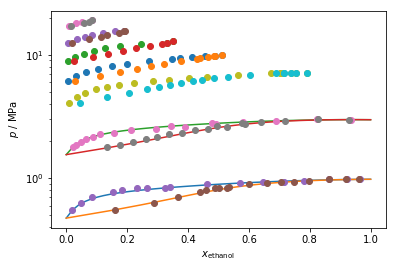

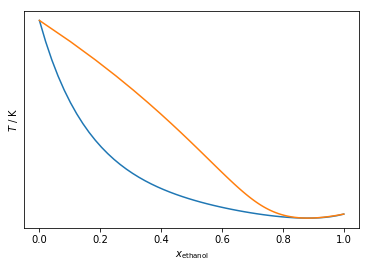

In [13]:
%matplotlib inline

class _fac(object):
    def __init__(self, j):
        assert(j['using_tau_r'])
        self.T_r = j['T_r']
        self.T_max = j['Tmax']
        self.T_min = j['Tmin']
        self.n = np.array(j['n'])
        self.t = np.array(j['t'])
        self.reducing_value = j['reducing_value']
    
    def psat(self, T):
        theta = 1-T/self.T_r
        RHS = np.dot(self.n,theta**self.t)
        return self.reducing_value*np.exp(self.T_r/T*np.sum(RHS))
    
    def dpsat_dT(self, T):
        im = 0+1j; h = 1e-10
        return (self.psat(T+im*h)/h).imag # Complex step derivative
        
def psat_factory(fluid):
    # Get the JSON structure from CoolProp
    pS = json.loads(CP.get_fluid_param_string(fluid,'JSON'))[0]['ANCILLARIES']['pS']
    return _fac(pS)

COSMOIsoline = namedtuple('COSMOIsoline', ['T','p','x0L','x0V'])
def get_isotherm(fluids, T):
    COSMO = cCOSMO.COSMO1(fluids, db)
    
    assert(len(fluids)==2)
    psats = [psat_factory(name) for name in fluids]
    TT,PP,X0L,X0V = [],[],[],[]
    for x0L in np.linspace(1e-6,1-1e-6):
        xL = [x0L, 1-x0L]
        gamma = np.exp(COSMO.get_lngamma(T, xL))
        p = gamma[0]*xL[0]*psats[0].psat(T) + gamma[1]*xL[1]*psats[1].psat(T)
        x0V = gamma[0]*xL[0]*psats[0].psat(T)/p
        TT.append(T); PP.append(p); X0L.append(x0L); X0V.append(x0V)
    return COSMOIsoline(TT, np.array(PP), np.array(X0L), X0V)

def get_isobar(fluids, p_Pa, Tguess):
    psats = [psat_factory(name) for name in fluids]
    assert(len(fluids)==2)
    TT,PP,X0L,X0V = [],[],[],[]
    for x0L in np.linspace(1e-6,1-1e-6):
        xL = [x0L, 1-x0L]
        def resid(T):
            gamma = np.exp(COSMO.get_lngamma(T, xL))
            pcalc = gamma[0]*xL[0]*psats[0].psat(T) + gamma[1]*xL[1]*psats[1].psat(T)
            return np.abs(pcalc-p_Pa)/p_Pa
        T = scipy.optimize.fsolve(resid, Tguess)
        gamma = np.exp(COSMO.get_lngamma(T, xL))
        p = p_Pa
        x0V = gamma[0]*xL[0]*psats[0].psat(T)/p
        TT.append(T); PP.append(p); X0L.append(x0L); X0V.append(x0V)
    return COSMOIsoline(np.array(TT),np.array(PP),np.array(X0L),X0V)

fluids = ['ETHANOL','WATER']
for iden in fluids:
    n = db.normalize_identifier(iden)
    db.add_profile(n)
    prof = db.get_profile(n)
    print(prof.name)
    
for T in [423.15, 473.15]:
    isoT = get_isotherm(fluids, T)
    plt.plot(isoT.x0L, isoT.p/1e6, label='bubble')
    plt.plot(isoT.x0V, isoT.p/1e6, label='dew')
    
for T, group in pandas.read_csv('t_p_x_y_isoth_red.dat',sep='\t').groupby('T / K'):
    plt.plot(group['x1_L'], group['p / MPa'], 'o')
    plt.plot(group['x1_V'], group['p / MPa'], 'o')
    
plt.xlabel(r'$x_{\rm ethanol}$')
plt.yscale('log')
plt.ylabel(r'$p$ / MPa');

%timeit get_isotherm(fluids, 423.15)
%timeit get_isobar(fluids, 101325.0, 373)
plt.figure()
for p in [101325.0]:
    isoP = get_isobar(fluids, p, 373)
    plt.plot(isoP.x0L, isoP.T/1e6, label='bubble')
    plt.plot(isoP.x0V, isoP.T/1e6, label='dew')
    
plt.xlabel(r'$x_{\rm ethanol}$')
plt.yscale('log')
plt.ylabel(r'$T$ / K');